## Table showing mean, standard deviation, skewness, and kurtosis of variables

In [2]:
# Import pandas and then import the csv file.
import pandas as pd
bike = pd.read_csv("C:/Users/18175/Documents/itom 6253/day_missing.csv")

# Use agg() to display the four moment statistics.
bike.agg(['mean', 'std', 'skew', 'kurtosis'])

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.820891,0.474747,0.628202,0.190879,846.431154,3654.640167,4474.522409
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,3.789773,0.163682,0.142467,0.077691,687.155473,1557.749491,1931.410624
skew,0.000000,-0.000384,-0.002742,-0.008149,5.654224,0.002742,-0.793147,0.957385,12.514630,-0.135637,-0.077185,0.669206,1.269990,0.042216,-0.032882
kurtosis,-1.200000,-1.342601,-2.005487,-1.209112,30.052462,-1.254282,-1.374686,-0.136467,162.450518,-0.985399,-0.049114,0.403355,1.339100,-0.702715,-0.800474


## Find which variables have a kurtosis that would indicate that outliers may be present.

In [3]:
# Use select_dtypes() and nunique() to filter and create a new dataframe that only includes
# continuous numeric variables.
unique = bike.select_dtypes(include = ['int64', 'float64'])
unique.nunique()

instant       731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          496
atemp         672
hum           590
windspeed     636
casual        597
registered    668
cnt           682
dtype: int64

In [4]:
# Use drop() to drop variables that are not continuous or have less than 10 unique values.
cont = unique.drop(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], axis=1)

In [5]:
# Use select_dtypes() again and agg() to create a table showing kurtosis of the continuous variables.
# The following 8 variables have outliers.
nums = []
nums.append(cont.select_dtypes(include = ['int64', 'float64']))

nums[0].agg(['kurtosis'])

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
kurtosis,-1.2,162.450518,-0.985399,-0.049114,0.403355,1.3391,-0.702715,-0.800474


## 3. If you detect the presence of any outliers, set them to missing.

In [6]:
# Import numpy.
import numpy as np

cont = unique.drop(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], axis=1)

# Create a for loop to detect outliers and set them to missing.
for j in cont :
    upperq = np.nanpercentile(bike[j], 75)
    lowerq = np.nanpercentile(bike[j], 25)
    iqr = upperq - lowerq
    
    upperw = upperq + 1.5 * iqr
    lowerw = np.maximum(lowerq - 1.5 * iqr, 0)
    
    bike[j] = np.where((bike[j] <= lowerw) | 
                       (bike[j] >= upperw), np.nan, bike[j])
    
cont.head(100)

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,0.226957,0.229270,0.436957,0.186900,NaN,1518.0,1600.0
5,6,0.204348,0.233209,0.518261,0.089565,88.0,1518.0,1606.0
6,7,0.196522,0.208839,0.498696,0.168726,148.0,1362.0,1510.0
7,8,0.165000,0.162254,NaN,0.266804,68.0,891.0,959.0
8,9,0.138333,0.116175,0.434167,0.361950,54.0,768.0,822.0
9,10,0.150833,0.150888,0.482917,0.223267,41.0,1280.0,1321.0


## 4. Impute missing values to the mean for the column in which they are present.

In [7]:
# Use the fillna() function to impute the mean for missing values.
cont = cont.fillna(cont.mean())
cont.isnull().sum()

instant       0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## 5. After imputation, do any columns have a kurtosis that might indicate the presence of outliers?

In [45]:
# Use same code as Question 4 except only include kurtosis.
# We can see that the kurtosis has not really changed after imputation.
# There are still outliers present.
nums = []
nums.append(cont.select_dtypes(include = ['int64', 'float64']))

nums[0].agg(['kurtosis'])

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
kurtosis,-1.2,166.598643,-0.925492,-0.016414,0.504048,1.411429,-0.657685,-0.747877


## 6. Change the date column into a type 'datetime' and then convert it to the index for the dataframe. Show the info() for the dataframe after conversion.

In [47]:
# Use to_datetime() to change the date column to a 'datetime' type.
bike.dteday = pd.to_datetime(bike.dteday)

# Convert this column to an index for the dataframe.
bike.set_index('dteday', inplace = True)

# Use info() to show the dataframe after conversion.
bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
instant       731 non-null float64
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          707 non-null float64
atemp         710 non-null float64
hum           721 non-null float64
windspeed     697 non-null float64
casual        676 non-null float64
registered    717 non-null float64
cnt           714 non-null float64
dtypes: float64(8), int64(7)
memory usage: 91.4 KB


## 7. Produce a scatterplot matrix of the following variables: cnt, temp, hum, windspeed, atemp. Use weathersit to color the dots.

In [48]:
# Import seaborn and matplotlib.
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\18175\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\18175\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


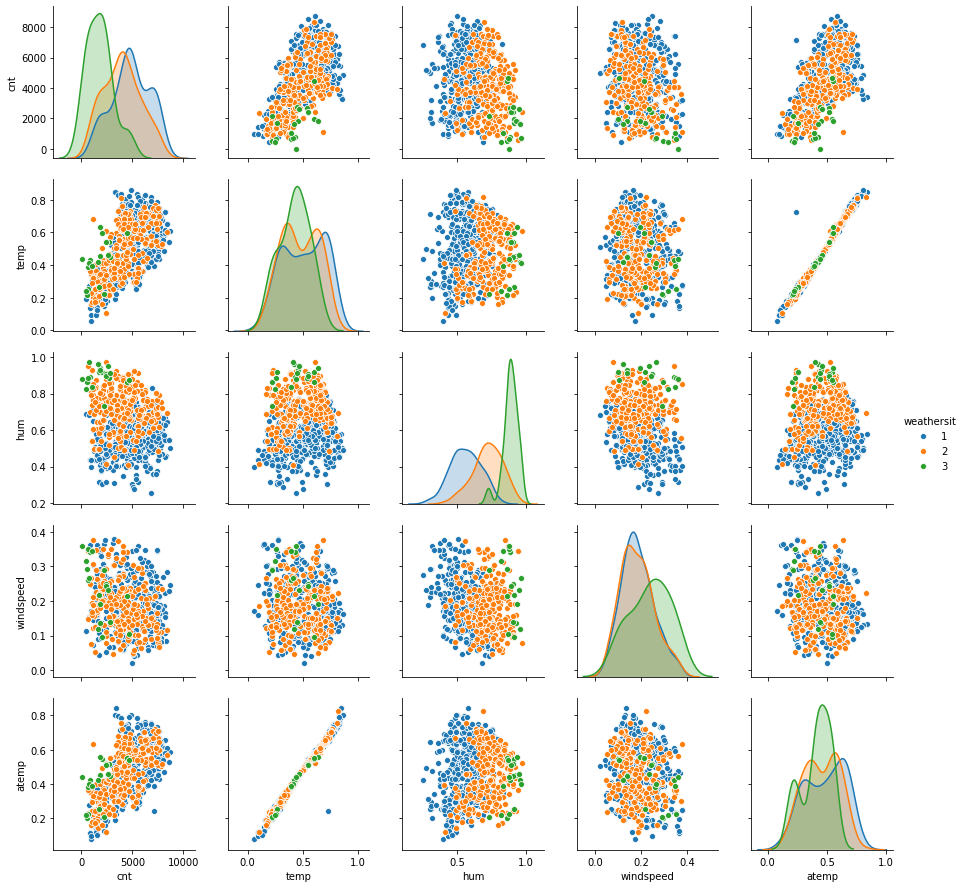

In [49]:
# Use pairplot() to create a scatterplot matrix of cnt, temp, hum, windspeed, and atemp.
# Color the dots by the weathersit variable.
plt.rcParams['figure.figsize'] = (4,4)
sb.pairplot(bike, vars = ['cnt', 'temp', 'hum', 'windspeed', 'atemp'], hue = 'weathersit')

## 8. Produce a chart of boxplots of cnt by season. Show them allon one chart. Be sure that the seasons are labelled with the name of the season.

([<matplotlib.axis.YTick at 0x1defff1b470>,
 <a list of 4 Text yticklabel objects>)

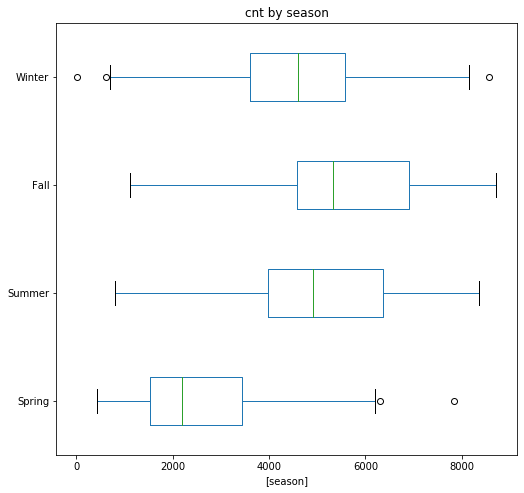

In [50]:
# Use boxplot() to creat a chart of boxplots of cnt by season.
plt.rcParams['figure.figsize'] = (8,8)
bike.boxplot(column = ['cnt'], by = ['season'], vert = False, grid = False)

# Title the plot.
plt.title('cnt by season')
plt.suptitle('')

# Use yticks() to label it with the names of the season.
plt.yticks([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'])

## 9. Produce a scatter plot of casual vs. registered users. Show the histograms of each in the margins of the plot.

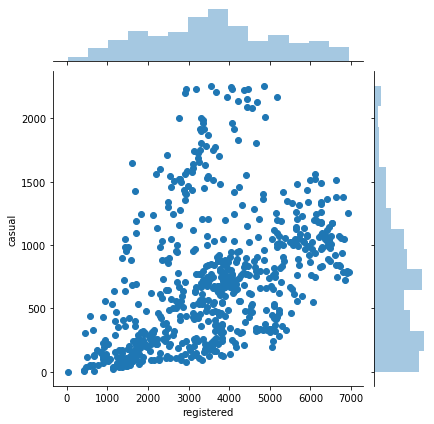

In [51]:
# Use jointplot() to show histograms in the margins of the scatter plot.
sb.jointplot(x = 'registered', y = 'casual', data = bike)

## 10. Produce a treemap with the following characteristics:
## -One rectangle each for the values of weathersit.
## -Label each rectangle with the name of the weathersit (not 
## its numeric code).
## -Each rectangle should have its own color.
## -The size of each rectangle is determined by the cnt.
## -Put a title on the chart.

Text(0.5, 0.98, 'weathersit by cnt')

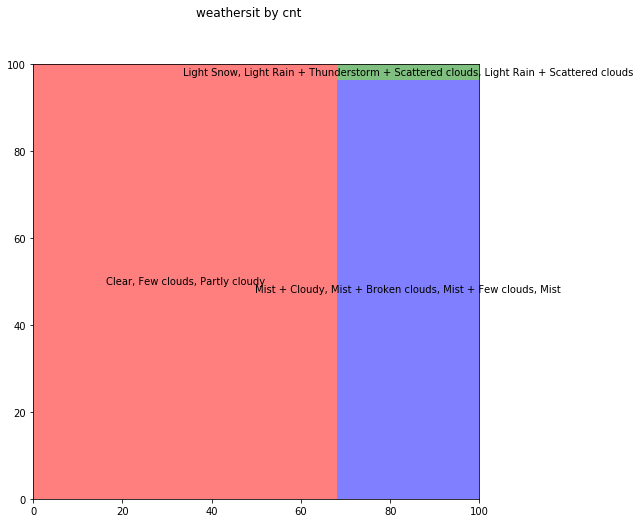

In [52]:
# Import squarify.
import squarify as sq

# Use plot() to create a treemap grouped by weathersit and sized by cnt.
treemap = bike.groupby('weathersit').cnt.sum().to_frame()
pd.DataFrame(treemap).reset_index(inplace = True)
sq.plot(sizes = treemap['cnt'], label = ['Clear, Few clouds, Partly cloudy', 
                                      'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                      'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                      'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'], 
        color = ['red','blue', 'green','grey'], alpha = 0.5)

# Title the chart.
plt.suptitle("weathersit by cnt")